   The problem consists in classifying all the blocks of the page
   layout of a document that has been detected by a segmentation
   process. This is an essential step in document analysis
   in order to separate text from graphic areas. Indeed, 
   the five classes are:<br><b>text (1)<br> horizontal line (2)<br>
   picture (3)<br> vertical line (4)<br> graphic (5)</b>
  
   <b>Relevant Information Paragraph:</b><br
   The 5473 examples comes from 54 distinct documents. <br>
   Each observation concerns one block. <br>
   All attributes are numeric.<br>
   Data are in a format readable by C4.5.<br>

   <b>Number of Instances: 5473.</b>

  <b>Number of Attributes :</b><br>
   <b>height</b>:   integer.         | Height of the block.<br>
   <b>lenght</b>:   integer.     | Length of the block. <br>
   <b>area</b>:     integer.    | Area of the block (height * lenght);<br>
   <b>eccen</b>:    continuous.  | Eccentricity of the block (lenght / height);<br>
   <b>p_black</b>:  continuous.  | Percentage of black pixels within the block (blackpix / area);<br>
   <b>p_and</b>:    continuous.        | Percentage of black pixels after the application of the Run Length Smoothing Algorithm (RLSA) (blackand / area);<br>
   <b>mean_tr</b>:  continuous.      | Mean number of white-black transitions (blackpix / wb_trans);<br>
   <b>blackpix</b>: integer.    | Total number of black pixels in the original bitmap of the block.<br>
   <b>blackand</b>: integer.        | Total number of black pixels in the bitmap of the block after the RLSA.<br>
   <b>wb_trans</b>: integer.          | Number of white-black transitions in the original bitmap of the block.<br>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# columns of dataset
columns = ["height","lenght","area","eccen","p_black","p_and","mean_tr","blackpix","blackand","wb_trans","class"]

df = pd.read_csv("/home/suyash/Downloads/page-blocks.data" ,sep="\s+" ,
                 names=columns,
                 header=None,
                )

In [3]:
df.shape  # dimension of dataset

(5473, 11)

In [4]:
df.head()

,height,lenght,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,class
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,1
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5473 entries, 0 to 5472
Data columns (total 11 columns):
height      5473 non-null int64
lenght      5473 non-null int64
area        5473 non-null int64
eccen       5473 non-null float64
p_black     5473 non-null float64
p_and       5473 non-null float64
mean_tr     5473 non-null float64
blackpix    5473 non-null int64
blackand    5473 non-null int64
wb_trans    5473 non-null int64
class       5473 non-null int64
dtypes: float64(4), int64(7)
memory usage: 470.5 KB


In [6]:
df.isna().sum() #no missing value is present

height      0
lenght      0
area        0
eccen       0
p_black     0
p_and       0
mean_tr     0
blackpix    0
blackand    0
wb_trans    0
class       0
dtype: int64

In [7]:
df.describe().T  #statistical analysis

,count,mean,std,min,25%,50%,75%,max
height,5473.0,10.473232,18.960564,1.000,7.000,8.000,10.000,804.0
lenght,5473.0,89.568244,114.721758,1.000,17.000,41.000,107.000,553.0
area,5473.0,1198.405628,4849.376950,7.000,114.000,322.000,980.000,143993.0
eccen,5473.0,13.753977,30.703737,0.007,2.143,5.167,13.625,537.0
p_black,5473.0,0.368642,0.177757,0.052,0.261,0.337,0.426,1.0
p_and,5473.0,0.785053,0.170661,0.062,0.679,0.803,0.927,1.0
mean_tr,5473.0,6.219278,69.079021,1.000,1.610,2.070,3.000,4955.0
blackpix,5473.0,365.930751,1270.333082,7.000,42.000,108.000,284.000,33017.0
blackand,5473.0,741.108167,1881.504302,7.000,95.000,250.000,718.000,46133.0
wb_trans,5473.0,106.662891,167.308362,1.000,17.000,49.000,126.000,3212.0


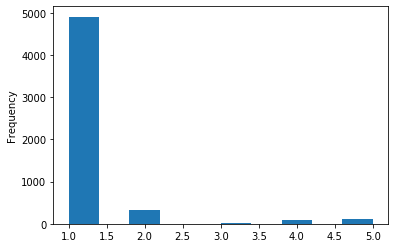

In [8]:
df['class'].plot(kind='hist') # highly imbalanced dataset

### Distribution of all attributes

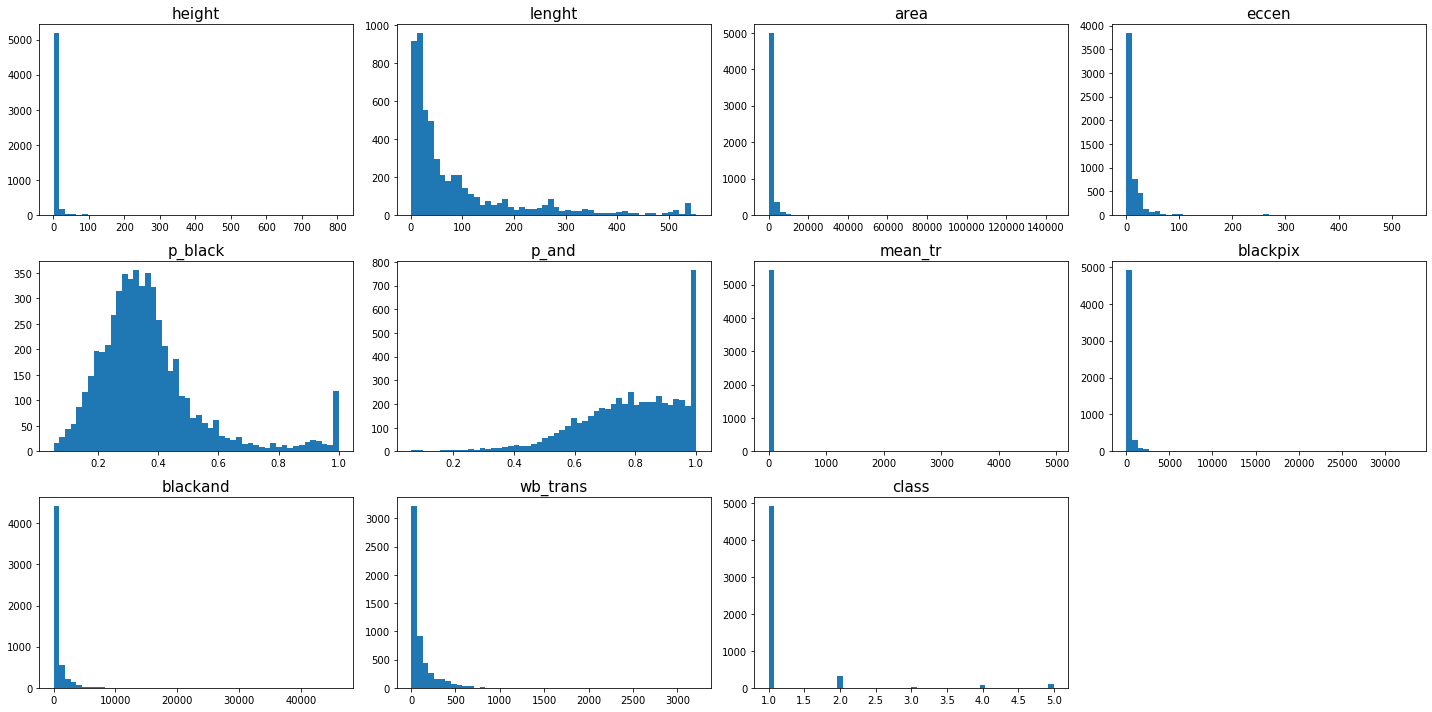

In [9]:
i=1
plt.figure(figsize=(20,10))

for col in df.columns:
    plt.subplot(3,4,i)
    plt.hist(df[col],bins=50)
    plt.tight_layout()
    plt.title(col,fontsize=15)
    i+=1

### Relationship between other attributes with target attribute

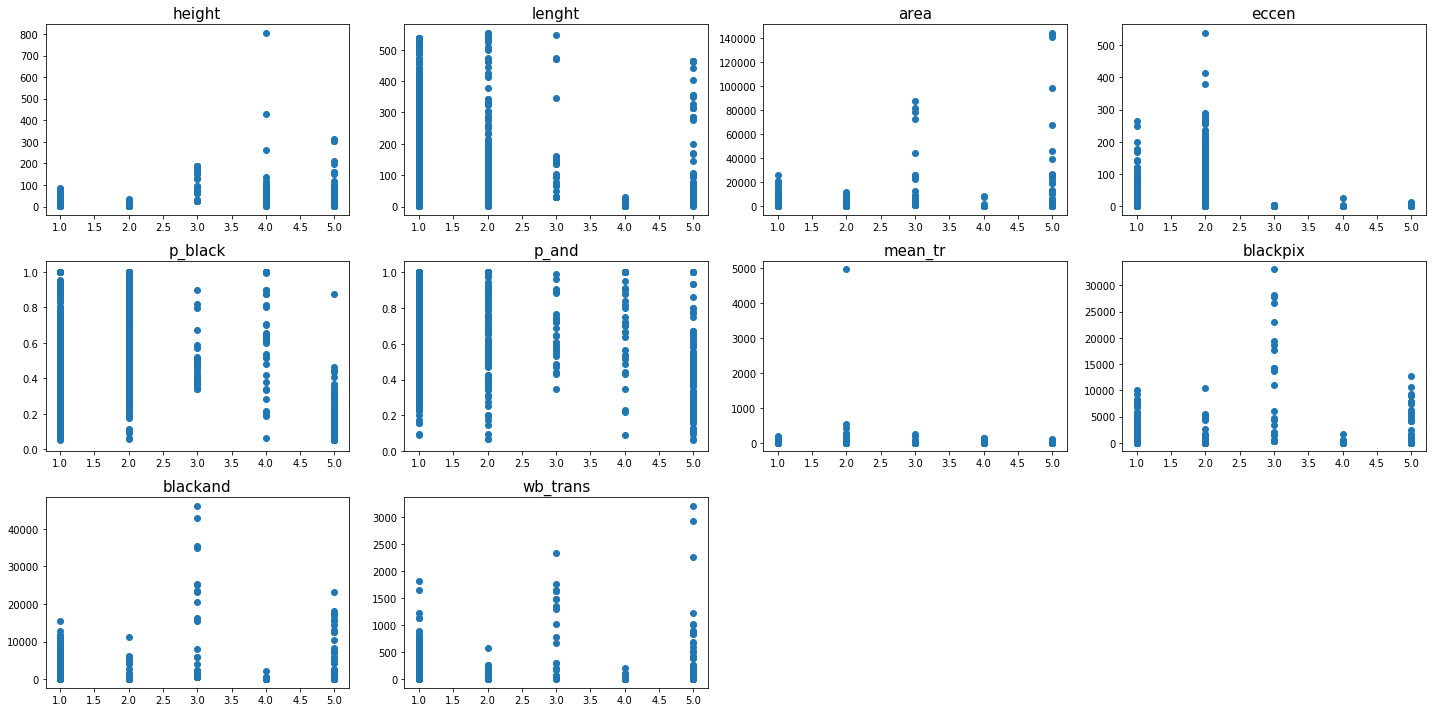

In [10]:
i=1
plt.figure(figsize=(20,10))

for col in df.drop(columns='class').columns:
    plt.subplot(3,4,i)
    plt.scatter(df['class'],df[col])
    plt.tight_layout()
    plt.title(col,fontsize=15)
    i+=1

### Boxplot of all attributes ( Outlier Detection )

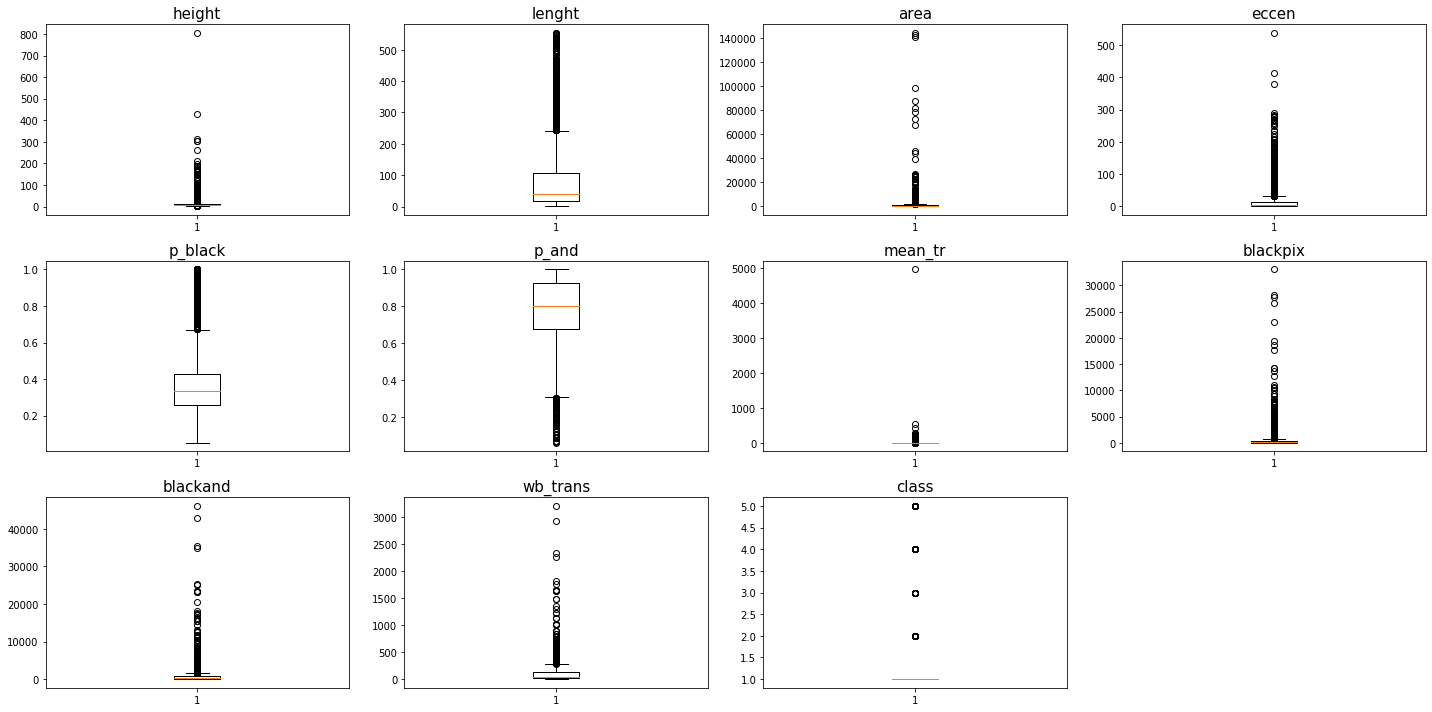

In [11]:
i=1
plt.figure(figsize=(20,10))

for col in df.columns:
    plt.subplot(3,4,i)
    plt.boxplot(df[col])
    plt.tight_layout()
    plt.title(col,fontsize=15)
    i+=1

### Removing Outliers 

In [12]:
df = df[df['height']<250] 
df = df[df['area']<35000]
df = df[df['eccen']<300]
df = df[df['mean_tr']<4000]
df = df[df['blackand']<30000]
df = df[df['wb_trans']<2000]

### After Removing Outliers 

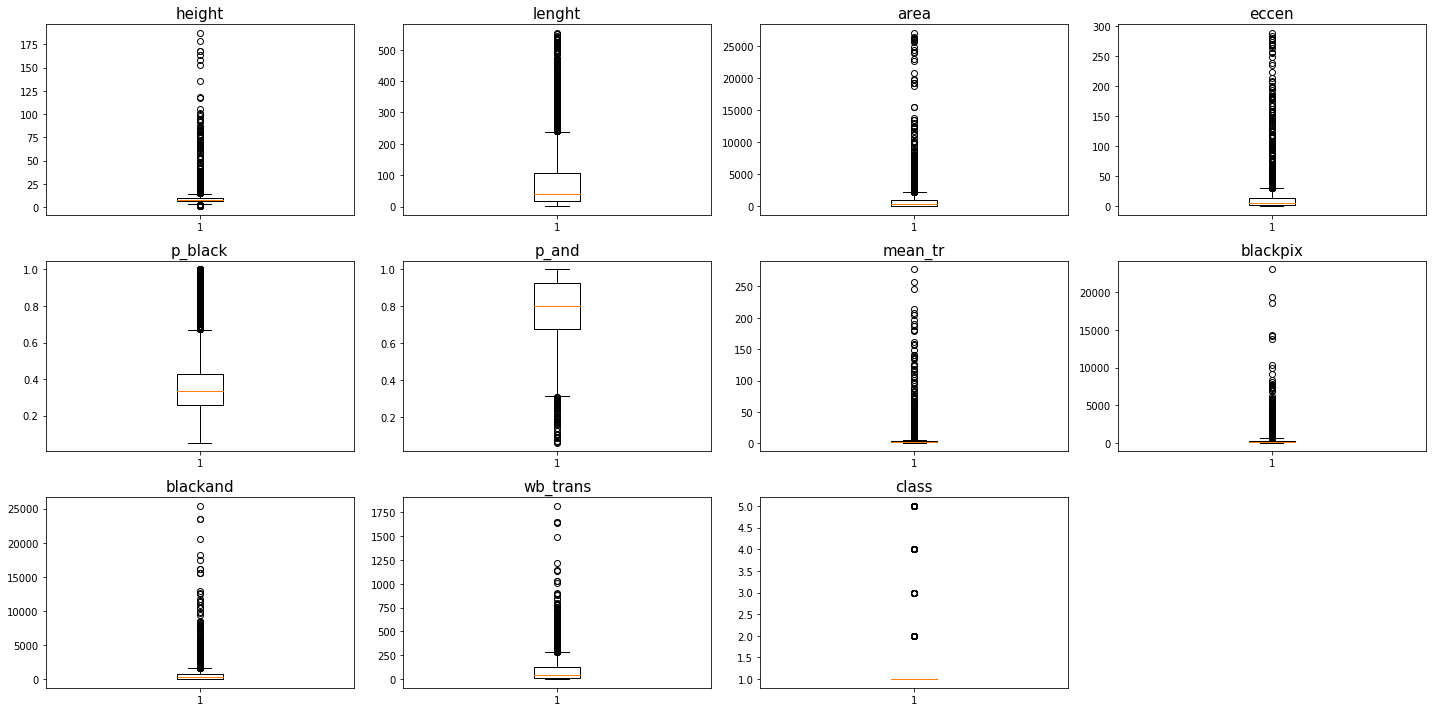

In [13]:
i=1
plt.figure(figsize=(20,10))

for col in df.columns:
    plt.subplot(3,4,i)
    plt.boxplot(df[col])
    plt.tight_layout()
    plt.title(col,fontsize=15)
    i+=1

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report

In [15]:
from sklearn.utils import shuffle
df = shuffle(df)

In [16]:
X = df.drop(columns=['class'])
Y = df['class']

#### Normalization ( z-score )

In [17]:
X= (X-X.mean())/X.std()

### Gaussian NB

#### K-Fold :
 That method is known as “k-fold cross validation”. It’s easy to follow and implement. Below are the steps for it:

1. Randomly split your entire dataset into k”folds”
2. For each k-fold in dataset, build model on k – 1 folds of the dataset. Then, test the model to check the effectiveness for kth fold
3. Record the error on each of the predictions
4. Repeat this until each of the k-folds has served as the test set
5. The average of k recorded errors is called the cross-validation error and will serve as performance metric for the model


In [18]:
GBN = GaussianNB()

In [19]:
scores = pd.DataFrame(columns=['MIN','MAX','AVG']) #dataframe for storing scores

#### 5-Fold Cross-validation

In [20]:
score5 = cross_val_score(GBN,X,Y,cv=5,verbose=3)

[CV]  ................................................................
[CV] .................................... , score=0.781, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.817, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.861, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.756, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.864, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [21]:
print("MIN - " , score5.min())
print("AVG - " , score5.mean())
print("MAX - " , score5.max())

MIN -  0.7557392102846648
AVG -  0.8156996671078831
MAX -  0.8640955004591369


#### 10-Fold Cross-validation

In [22]:
score10 = cross_val_score(GBN,X,Y,cv=10,verbose=3)

[CV]  ................................................................
[CV] .................................... , score=0.777, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.807, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.812, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.802, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.844, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.796, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.787, total=   0.0s
[CV]  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [23]:
print("MIN - " , score10.min())
print("AVG - " , score10.mean())
print("MAX - " , score10.max())

MIN -  0.7591911764705882
AVG -  0.8059948469678224
MAX -  0.848987108655617


### Calculate the cross validation score on different split point in k-fold


In [24]:
for i in range(1,20):
    score = cross_val_score(GBN,X,Y,cv=i+1)
    scores.loc[i+1] = [score.min() , score.max() , score.mean()]

Text(0.5, 1.0, 'Accuracy Vs N_Split')

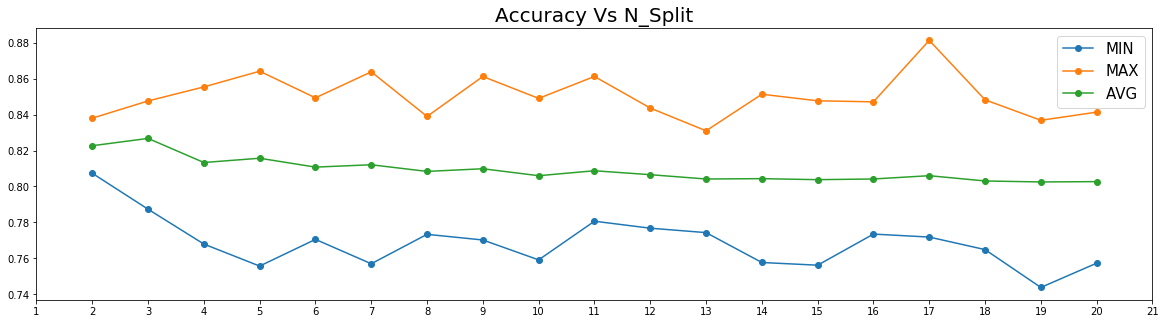

In [25]:
plt.figure(figsize=(20,5))

plt.plot(scores['MIN'],marker='o')
plt.plot(scores['MAX'],marker='o')
plt.plot(scores['AVG'],marker='o')

plt.xticks(np.arange(1, 22, 1.0))
plt.legend(['MIN','MAX','AVG'],fontsize=15)
plt.title("Accuracy Vs N_Split" ,fontsize=20)

#### Stratified K-Fold
Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole.<br>
It is generally a better approach when dealing with both bias and variance. A randomly selected fold might not adequately represent the minor class, particularly in cases where there is a huge class imbalance. 

In [26]:
scores2 = pd.DataFrame(columns=['MIN','MAX','AVG']) #dataframe for storing scores

In [27]:
#calculate the cross validation score on different split point in stratified k-fold and store into dataframe
for i in range(1,20):
    cv = StratifiedKFold(n_splits=i+1,shuffle=True)
    score = cross_val_score(GBN,X,Y,cv=cv)               #Crossvalidation
    scores2.loc[i+1] = [score.min() , score.max() , score.mean()]

Text(0.5, 1.0, 'Accuracy Vs N_Split')

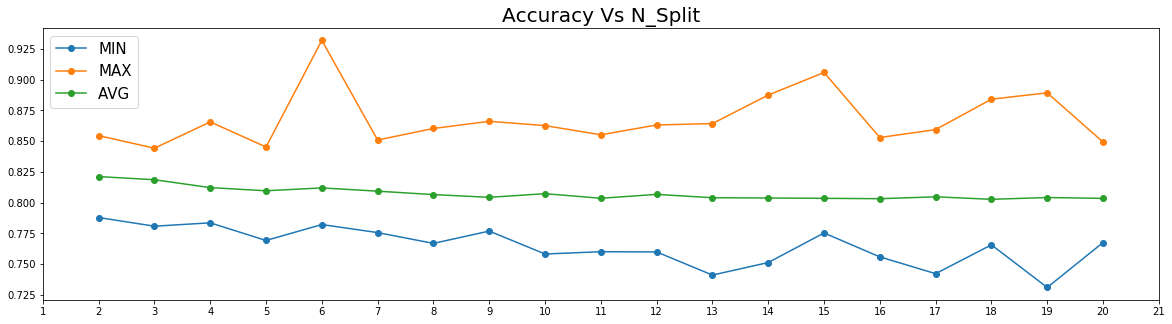

In [28]:
plt.figure(figsize=(20,5))

plt.plot(scores2['MIN'],marker='o')
plt.plot(scores2['MAX'],marker='o')
plt.plot(scores2['AVG'],marker='o')

plt.xticks(np.arange(1, 22, 1.0))
plt.legend(['MIN','MAX','AVG'],fontsize=15)
plt.title("Accuracy Vs N_Split" ,fontsize=20)

# THANK YOU